In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#set display options

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [2]:
#load Data set

df=pd.read_csv('ecommerce_customer_behavior_dataset_v2.csv')

#Look at Data Set
print('Dataset Shape:', df.shape)
print("\nFirst 5 rows")
df.head()

Dataset Shape: (17049, 18)

First 5 rows


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [3]:
# Check column names and data types
print("Column Information:")
print(df.info())
print("\n" + "="*50 + "\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Basic statistics
print("Basic Statistics:")
df.describe()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Session_Duration_Minutes  17049 non-null 

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000,17049.000000
mean,34.945745,447.901689,3.011379,69.788135,1277.438711,14.535633,9.003109,6.503607,3.899408
std,11.046855,722.319705,1.417027,240.704662,2358.436375,2.925524,2.259954,3.488787,1.128803
min,18.000000,5.050000,1.000000,0.000000,6.210000,4.000000,1.000000,1.000000,1.000000
25%,26.000000,73.260000,2.000000,0.000000,172.970000,13.000000,7.000000,4.000000,3.000000
50%,35.000000,174.680000,3.000000,0.000000,455.850000,15.000000,9.000000,6.000000,4.000000
75%,42.000000,494.570000,4.000000,32.710000,1267.750000,17.000000,11.000000,8.000000,5.000000
max,75.000000,7900.010000,5.000000,6538.290000,37852.050000,26.000000,18.000000,25.000000,5.000000


In [4]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()

# Check the result
print("Date conversion successful!")
print("\nNew columns added:")
print(df[['Date', 'Year', 'Month', 'Month_Name', 'DayOfWeek']].head())

Date conversion successful!

New columns added:
        Date  Year  Month Month_Name DayOfWeek
0 2023-05-29  2023      5        May    Monday
1 2023-10-12  2023     10    October  Thursday
2 2023-12-05  2023     12   December   Tuesday
3 2023-05-11  2023      5        May  Thursday
4 2023-06-16  2023      6       June    Friday


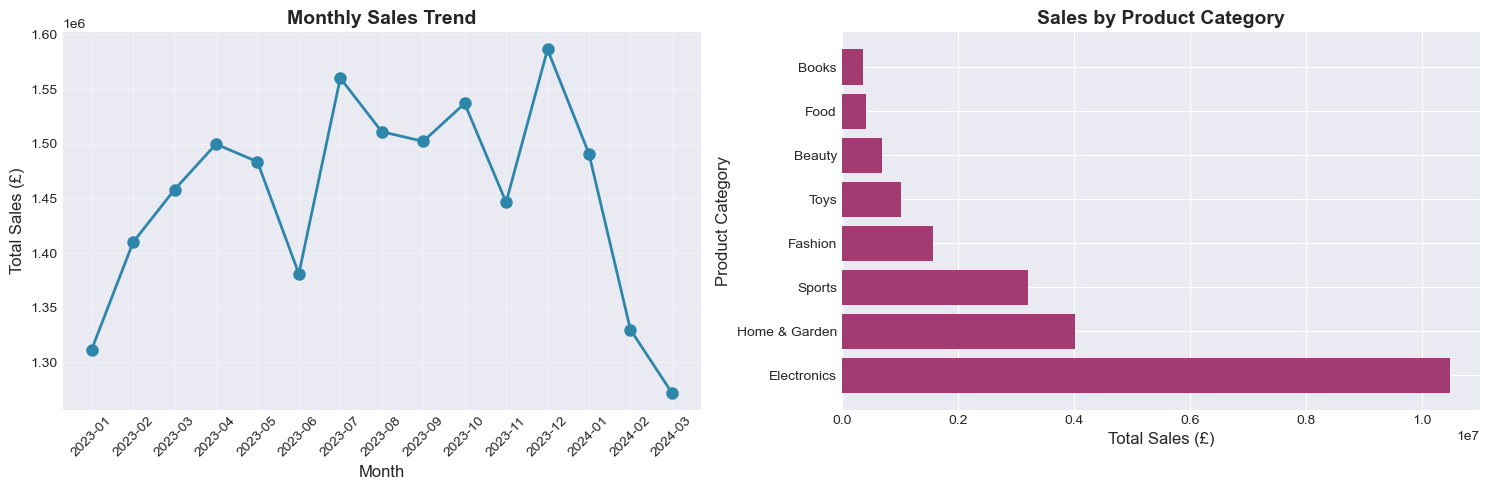

In [6]:
import os

# Create images folder (Windows-friendly)
os.makedirs('images', exist_ok=True)

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: Sales Over Time (FIXED)
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

axes[0].plot(monthly_sales['YearMonth'], monthly_sales['Total_Amount'], 
             marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Total Sales (£)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Chart 2: Sales by Product Category
category_sales = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
axes[1].barh(category_sales.index, category_sales.values, color='#A23B72')
axes[1].set_title('Sales by Product Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Sales (£)', fontsize=12)
axes[1].set_ylabel('Product Category', fontsize=12)

plt.tight_layout()
plt.savefig('images/sales_overview.png', dpi=300, bbox_inches='tight')
plt.show()


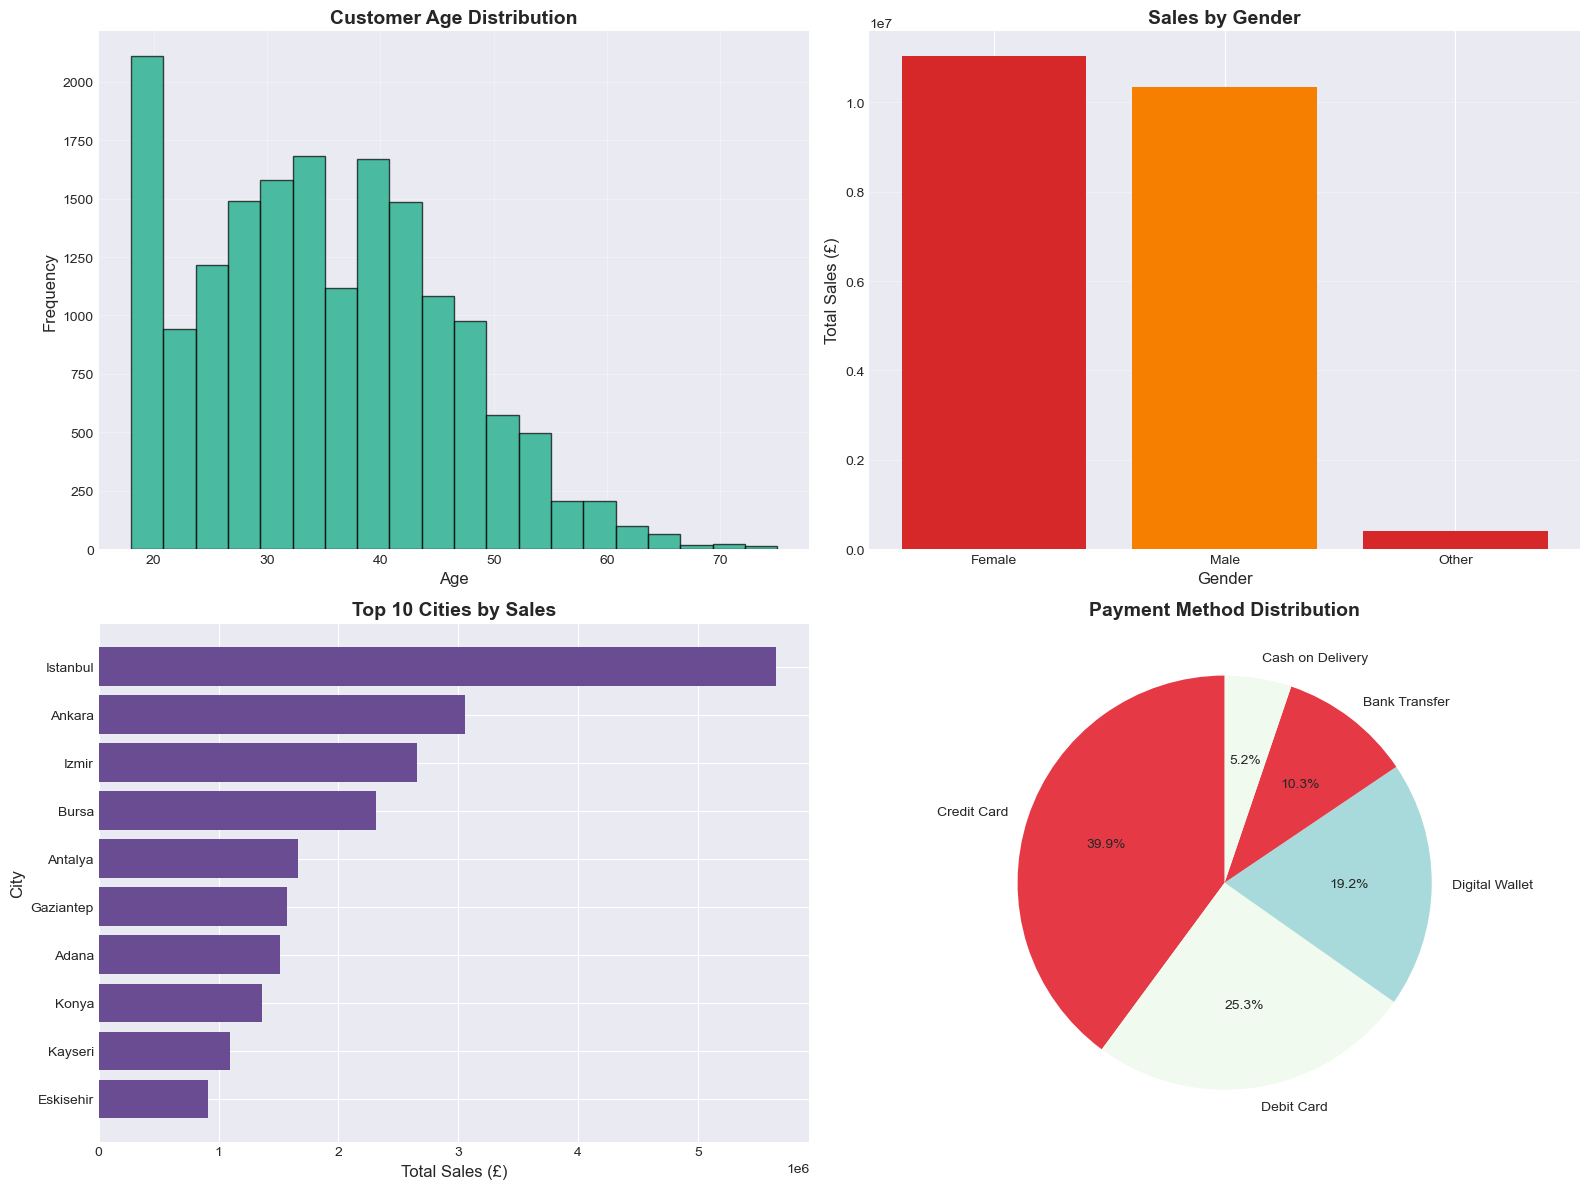

In [8]:
# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 3: Customer Age Distribution
axes[0, 0].hist(df['Age'], bins=20, color='#06A77D', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Customer Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Chart 4: Sales by Gender
gender_sales = df.groupby('Gender')['Total_Amount'].sum().sort_values(ascending=False)
axes[0, 1].bar(gender_sales.index, gender_sales.values, color=['#D62828', '#F77F00'])
axes[0, 1].set_title('Sales by Gender', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Total Sales (£)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Chart 5: Top 10 Cities by Sales
city_sales = df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False).head(10)
axes[1, 0].barh(city_sales.index, city_sales.values, color='#6A4C93')
axes[1, 0].set_title('Top 10 Cities by Sales', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Total Sales (£)', fontsize=12)
axes[1, 0].set_ylabel('City', fontsize=12)
axes[1, 0].invert_yaxis()

# Chart 6: Payment Method Distribution
payment_counts = df['Payment_Method'].value_counts()
axes[1, 1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
               colors=['#E63946', '#F1FAEE', '#A8DADC'], startangle=90)
axes[1, 1].set_title('Payment Method Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('images/customer_insights.png', dpi=300, bbox_inches='tight')
plt.show()


# Complete dashboard

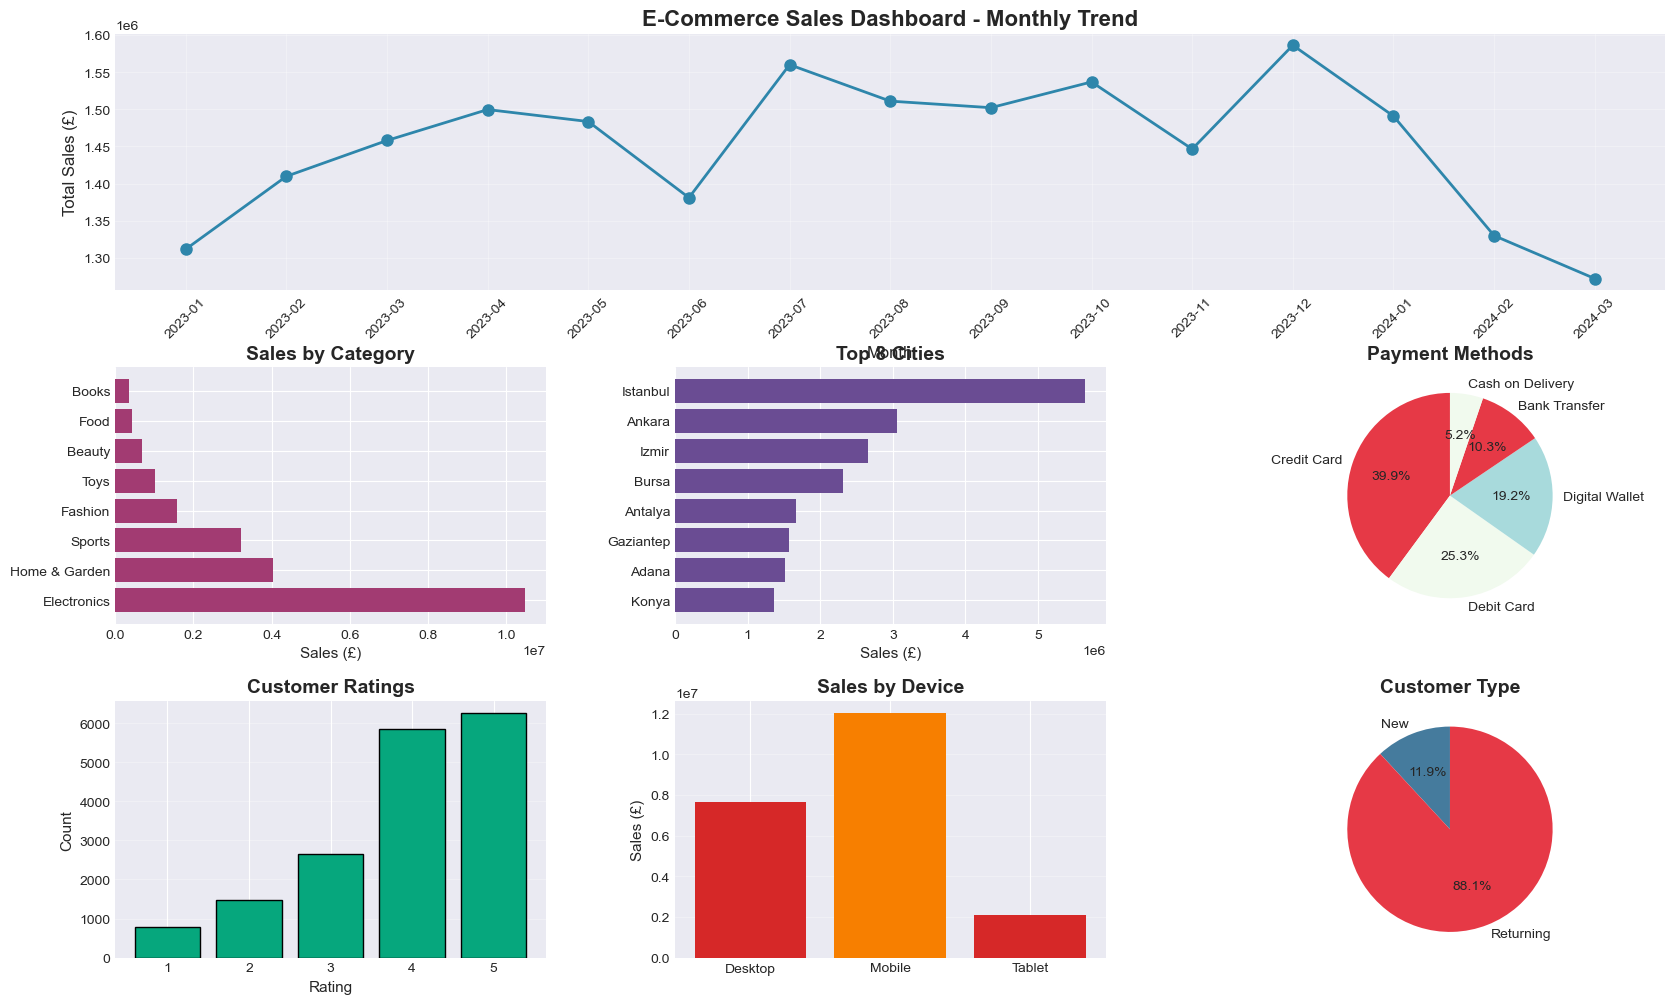

In [9]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Chart 1: Monthly Sales Trend
ax1 = fig.add_subplot(gs[0, :])
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)
ax1.plot(monthly_sales['YearMonth'], monthly_sales['Total_Amount'], 
         marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax1.set_title('E-Commerce Sales Dashboard - Monthly Trend', fontsize=16, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Total Sales (£)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Chart 2: Sales by Category
ax2 = fig.add_subplot(gs[1, 0])
category_sales = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
ax2.barh(category_sales.index, category_sales.values, color='#A23B72')
ax2.set_title('Sales by Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sales (£)', fontsize=11)

# Chart 3: Top Cities
ax3 = fig.add_subplot(gs[1, 1])
city_sales = df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False).head(8)
ax3.barh(city_sales.index, city_sales.values, color='#6A4C93')
ax3.set_title('Top 8 Cities', fontsize=14, fontweight='bold')
ax3.set_xlabel('Sales (£)', fontsize=11)
ax3.invert_yaxis()

# Chart 4: Payment Methods
ax4 = fig.add_subplot(gs[1, 2])
payment_counts = df['Payment_Method'].value_counts()
ax4.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
        colors=['#E63946', '#F1FAEE', '#A8DADC'], startangle=90)
ax4.set_title('Payment Methods', fontsize=14, fontweight='bold')

# Chart 5: Customer Rating
ax5 = fig.add_subplot(gs[2, 0])
rating_counts = df['Customer_Rating'].value_counts().sort_index()
ax5.bar(rating_counts.index, rating_counts.values, color='#06A77D', edgecolor='black')
ax5.set_title('Customer Ratings', fontsize=14, fontweight='bold')
ax5.set_xlabel('Rating', fontsize=11)
ax5.set_ylabel('Count', fontsize=11)
ax5.grid(True, alpha=0.3, axis='y')

# Chart 6: Device Type
ax6 = fig.add_subplot(gs[2, 1])
device_sales = df.groupby('Device_Type')['Total_Amount'].sum()
ax6.bar(device_sales.index, device_sales.values, color=['#D62828', '#F77F00'])
ax6.set_title('Sales by Device', fontsize=14, fontweight='bold')
ax6.set_ylabel('Sales (£)', fontsize=11)
ax6.grid(True, alpha=0.3, axis='y')

# Chart 7: Returning vs New Customers
ax7 = fig.add_subplot(gs[2, 2])
customer_type = df.groupby('Is_Returning_Customer')['Total_Amount'].sum()
labels = ['New', 'Returning']
ax7.pie(customer_type.values, labels=labels, autopct='%1.1f%%',
        colors=['#457B9D', '#E63946'], startangle=90)
ax7.set_title('Customer Type', fontsize=14, fontweight='bold')

plt.savefig('images/complete_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
# Calculate Key Business Metrics
print("="*60)
print("E-COMMERCE BUSINESS INSIGHTS")
print("="*60)

# 1. Overall Metrics
total_revenue = df['Total_Amount'].sum()
total_orders = df['Order_ID'].nunique()
avg_order_value = df['Total_Amount'].mean()
total_customers = df['Customer_ID'].nunique()

print("\n📊 OVERALL PERFORMANCE:")
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: £{avg_order_value:,.2f}")
print(f"Total Customers: {total_customers:,}")

# 2. Top Products
print("\n🏆 TOP 5 PRODUCT CATEGORIES:")
top_categories = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False).head(5)
for i, (category, sales) in enumerate(top_categories.items(), 1):
    print(f"{i}. {category}: £{sales:,.2f}")

# 3. Customer Insights
print("\n👥 CUSTOMER INSIGHTS:")
returning_pct = (df['Is_Returning_Customer'].sum() / len(df)) * 100
avg_rating = df['Customer_Rating'].mean()
print(f"Returning Customers: {returning_pct:.1f}%")
print(f"Average Customer Rating: {avg_rating:.2f}/5.0")

# 4. Top Cities
print("\n🌆 TOP 5 CITIES BY REVENUE:")
top_cities = df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False).head(5)
for i, (city, sales) in enumerate(top_cities.items(), 1):
    print(f"{i}. {city}: £{sales:,.2f}")

# 5. Device Preference
print("\n📱 DEVICE USAGE:")
device_stats = df.groupby('Device_Type')['Total_Amount'].sum()
for device, sales in device_stats.items():
    pct = (sales / total_revenue) * 100
    print(f"{device}: £{sales:,.2f} ({pct:.1f}%)")

print("\n" + "="*60)

E-COMMERCE BUSINESS INSIGHTS

📊 OVERALL PERFORMANCE:
Total Revenue: £21,779,052.59
Total Orders: 17,049
Average Order Value: £1,277.44
Total Customers: 5,000

🏆 TOP 5 PRODUCT CATEGORIES:
1. Electronics: £10,481,897.65
2. Home & Garden: £4,023,903.94
3. Sports: £3,205,086.99
4. Fashion: £1,577,035.70
5. Toys: £1,014,237.53

👥 CUSTOMER INSIGHTS:
Returning Customers: 88.2%
Average Customer Rating: 3.90/5.0

🌆 TOP 5 CITIES BY REVENUE:
1. Istanbul: £5,646,595.78
2. Ankara: £3,052,443.10
3. Izmir: £2,651,743.92
4. Bursa: £2,317,028.10
5. Antalya: £1,661,594.15

📱 DEVICE USAGE:
Desktop: £7,661,437.07 (35.2%)
Mobile: £12,028,685.29 (55.2%)
Tablet: £2,088,930.23 (9.6%)

